<a href="https://colab.research.google.com/github/jaskirat0001/Walmart-Product/blob/main/walmart_product_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
a = pd.read_csv('Train.csv')

In [ ]:
a.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
a.shape

(8523, 12)

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
a.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
b = a['Item_Weight'].mean()
b

12.857645184135976

In [ ]:
a['Outlet_Size'].mode()

0    Medium
dtype: object

In [ ]:
a['Item_Weight'].fillna(b,inplace=True)

In [ ]:
a.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
mode_outlet_size = a.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
b = a['Outlet_Size'].isnull()

In [ ]:
print(b)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
a.loc[b,'Outlet_Size'] = a.loc[b,'Outlet_Type'].apply(lambda x: mode_outlet_size)

In [ ]:
a.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
a.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


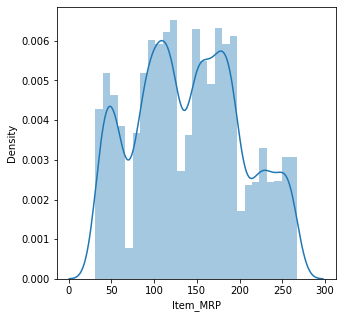

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(a['Item_MRP'])
# sns.histplot(a['Item_Outlet_Sales'])
# plt.show()
plt.show()

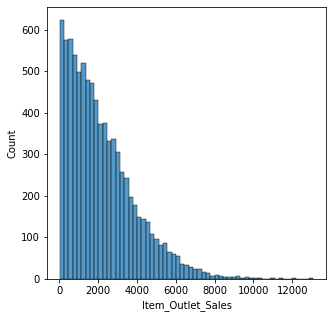

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(a['Item_Outlet_Sales'])
plt.show()

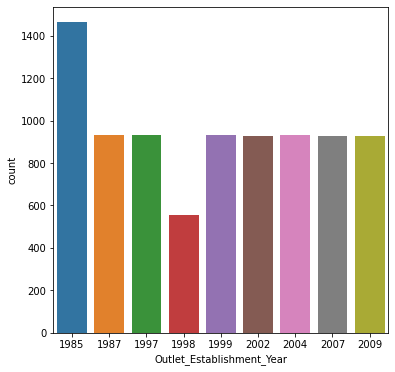

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=a)
plt.show()

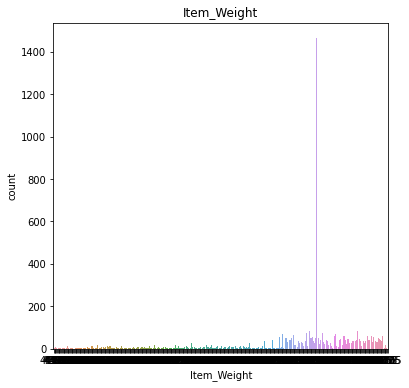

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Weight',data=a)
plt.title('Item_Weight')
plt.show()

In [ ]:
a.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
a['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
a.replace({'Item_Fat_Content':{'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'}}, inplace=True)

In [ ]:
a['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
encoder = LabelEncoder()

In [ ]:
a['Item_Identifier'] = encoder.fit_transform(a['Item_Identifier'])

a['Outlet_Identifier'] = encoder.fit_transform(a['Outlet_Identifier'])

a['Item_Fat_Content'] = encoder.fit_transform(a['Item_Fat_Content'])

a['Item_Type'] = encoder.fit_transform(a['Item_Type'])

# a['Outlet_Size'] = encoder.fit_transform(a['Outlet_Size'])

a['Outlet_Location_Type'] = encoder.fit_transform(a['Outlet_Location_Type'])

a['Outlet_Type'] = encoder.fit_transform(a['Outlet_Type'])

In [ ]:
a.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [ ]:
a.drop(columns='Outlet_Size',axis=1,inplace=True)

In [ ]:
X = a.drop(columns='Item_Outlet_Sales',axis=1)
Y = a['Item_Outlet_Sales']

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
print(X_train.shape,X_test.shape,X.shape)

(5966, 10) (2557, 10) (8523, 10)


In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

[17:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [ ]:
print(r2_train)

0.634680015092508


In [ ]:
testing_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = metrics.r2_score(Y_test,testing_data_prediction)

In [ ]:
print(r2_test)

0.6031354712120233
